# Wprowadzenie

Skrypt pokazuje jak użyć pakietu SciKit do wizualizacji danych na przykładzie zestawu danych zawierającego obrazy cyfr pisanych ręcznie.

In [1]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn import (datasets, decomposition, ensemble, manifold, random_projection)

In [2]:
def plot_digits(X, y):
    X = (X - np.min(X, 0)) / (np.max(X, 0) - np.min(X, 0))

    plt.figure(figsize=(12, 9))

    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(0.1*y[i]), fontdict={'weight':'bold', 'size':8})

    plt.xticks([])
    plt.yticks([])
    plt.show()

# Wczytanie danych

In [3]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
N, d = X.shape

# Wyświetlenie przykładowych cyfr

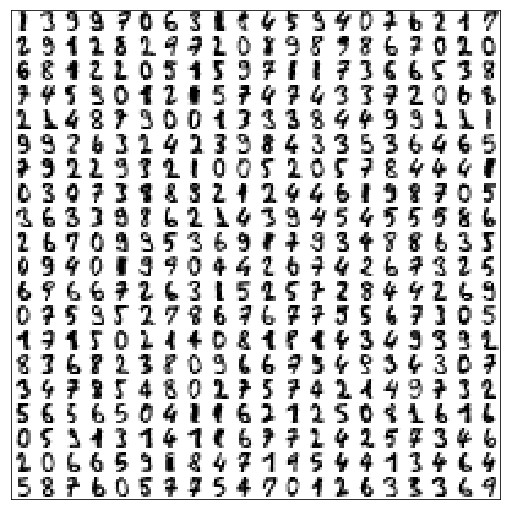

In [4]:
M = 20
image = np.zeros((10 * M, 10 * M))
order = np.random.permutation(N)
for i in range(M):
    for j in range(M):
        image[10*i+1:10*i+9, 10*j+1:10*j+9] = X[order[i*M+j], :].reshape((8, 8))

plt.figure(figsize=(9, 9))
plt.imshow(image, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()



# Rzut na dwie losowo wybrane osie

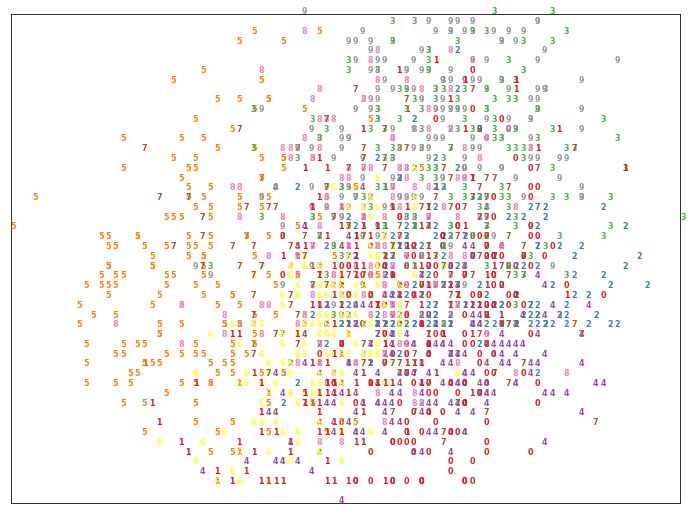

In [5]:
X_projected = random_projection.SparseRandomProjection(n_components=2).fit_transform(X)
plot_digits(X_projected, digits.target)

# Principal Component Analysis (PCA)

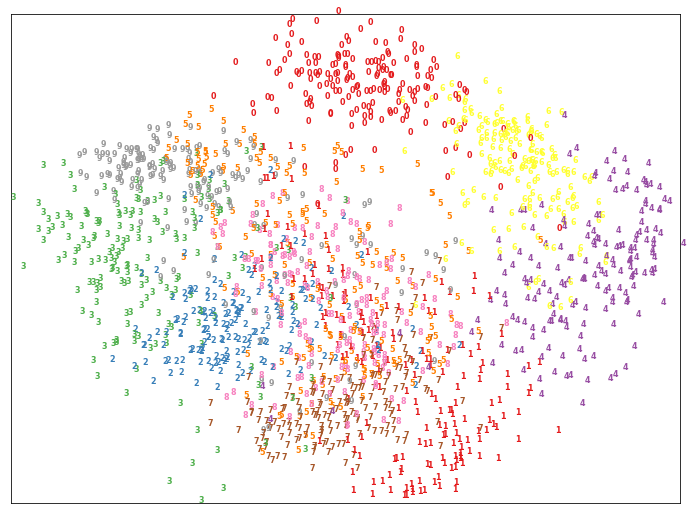

In [9]:
X_pca = decomposition.PCA(n_components=2, whiten=True).fit_transform(X)
plot_digits(X_pca, digits.target)

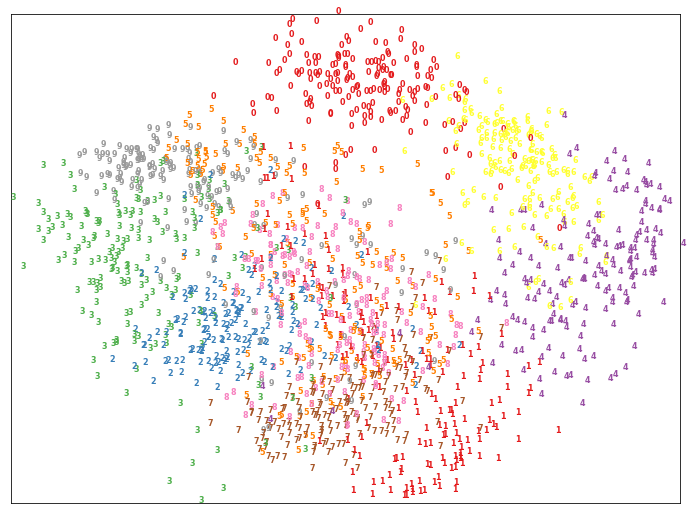

In [10]:
X_pca = decomposition.PCA(n_components=2, whiten=False).fit_transform(X)
plot_digits(X_pca, digits.target)

# Kernel Principal Component Analysis (KPCA)

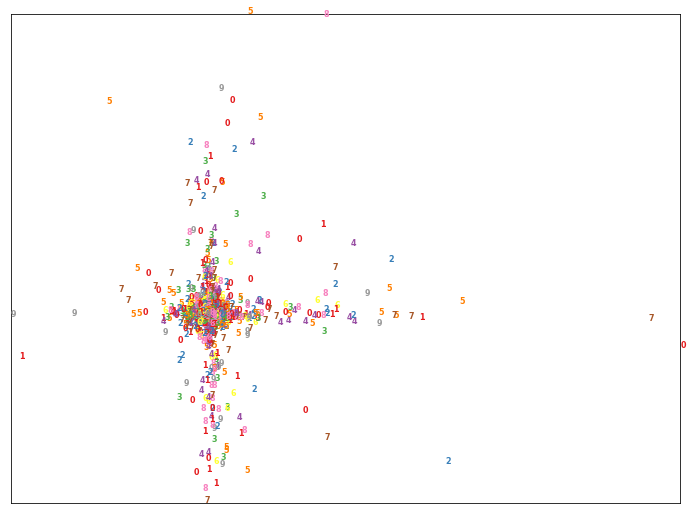

In [13]:
X_kpca = decomposition.KernelPCA(n_components=2, kernel="rbf", gamma=10).fit_transform(X)
plot_digits(X_kpca, digits.target)

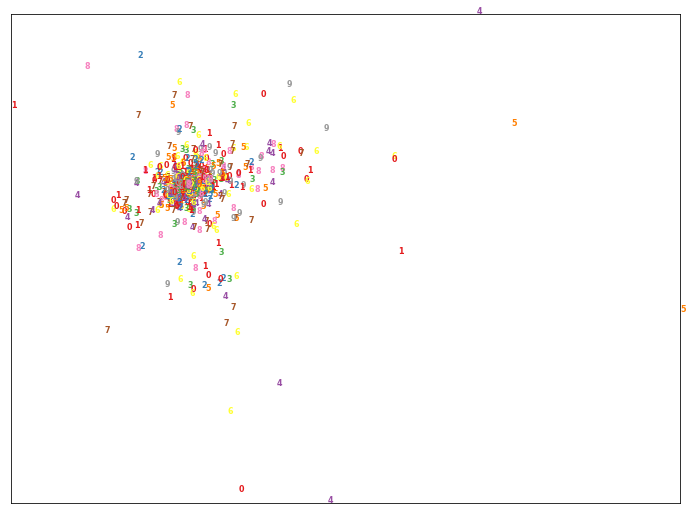

In [14]:
X_kpca = decomposition.KernelPCA(n_components=2, kernel="rbf", gamma=15).fit_transform(X)
plot_digits(X_kpca, digits.target)

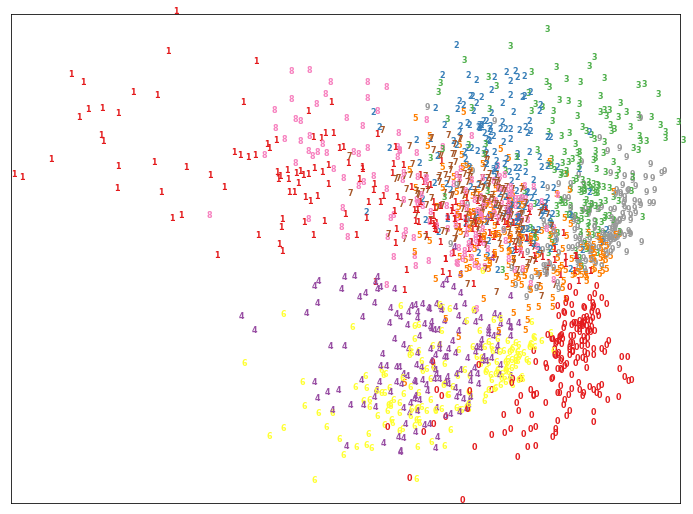

In [20]:
X_kpca = decomposition.KernelPCA(n_components=2, kernel="poly", degree=4, coef0=0, gamma=15).fit_transform(X)
plot_digits(X_kpca, digits.target)

# Isomap

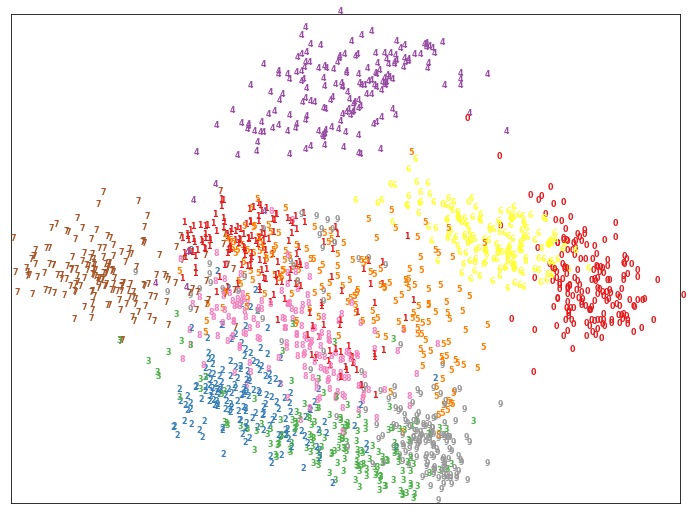

In [23]:
X_iso = manifold.Isomap(n_neighbors=10, n_components=2).fit_transform(X)
plot_digits(X_iso, digits.target)

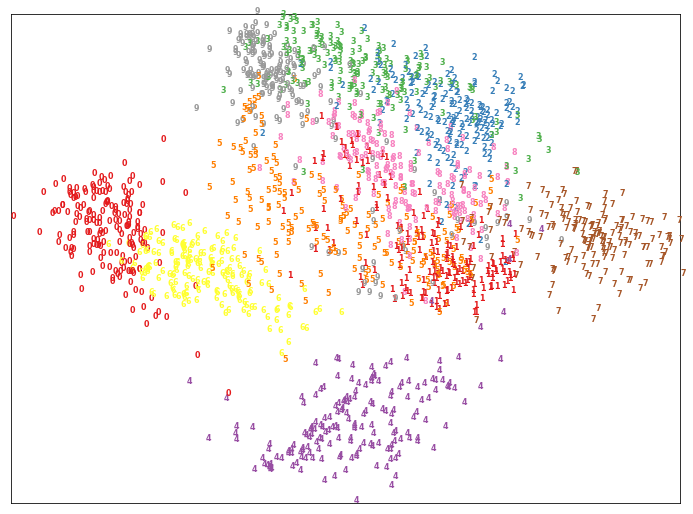

In [21]:
X_iso = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(X)
plot_digits(X_iso, digits.target)

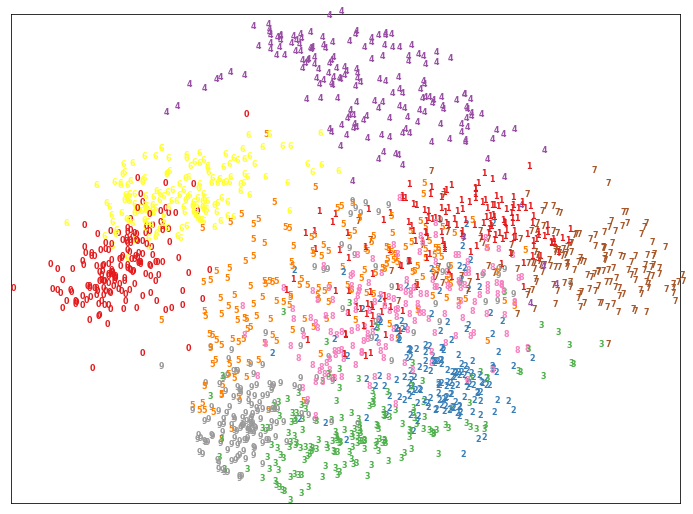

In [22]:
X_iso = manifold.Isomap(n_neighbors=60, n_components=2).fit_transform(X)
plot_digits(X_iso, digits.target)

# Locally Linear Embedding (LLE)

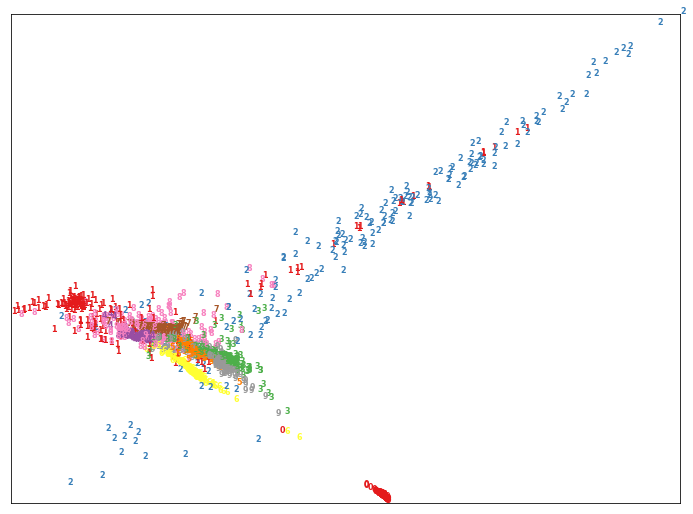

In [31]:
X_lle = manifold.LocallyLinearEmbedding(n_neighbors=15, reg=0.001, n_components=2).fit_transform(X)
plot_digits(X_lle, digits.target)

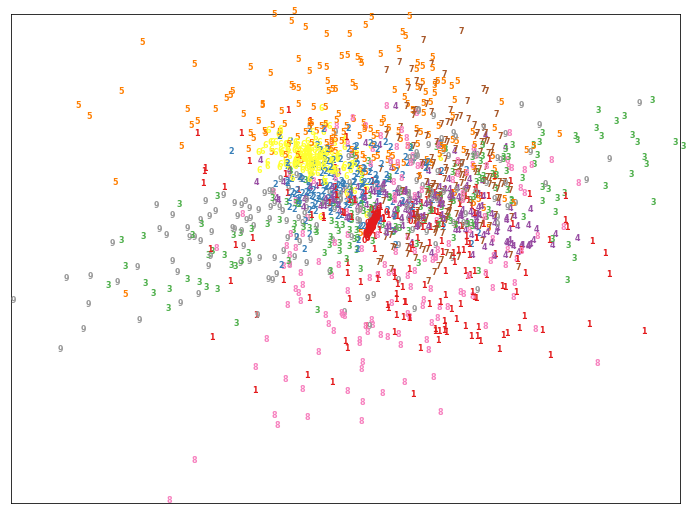

In [24]:
X_lle = manifold.LocallyLinearEmbedding(n_neighbors=30, reg=0.001, n_components=2).fit_transform(X)
plot_digits(X_lle, digits.target)

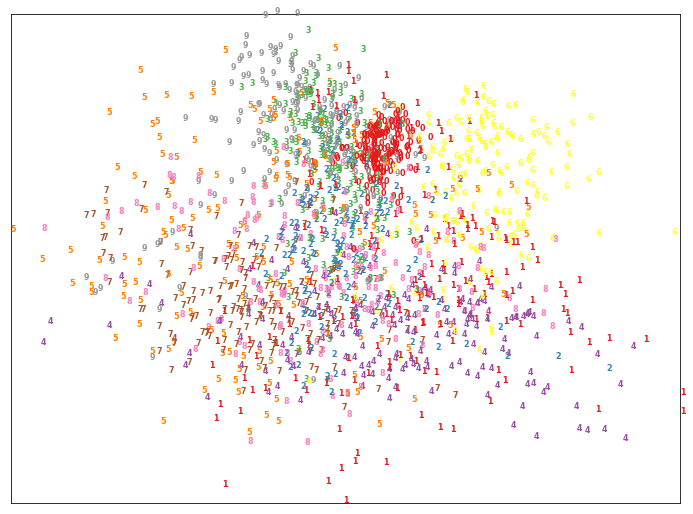

In [25]:
X_lle = manifold.LocallyLinearEmbedding(n_neighbors=60, reg=0.001, n_components=2).fit_transform(X)
plot_digits(X_lle, digits.target)

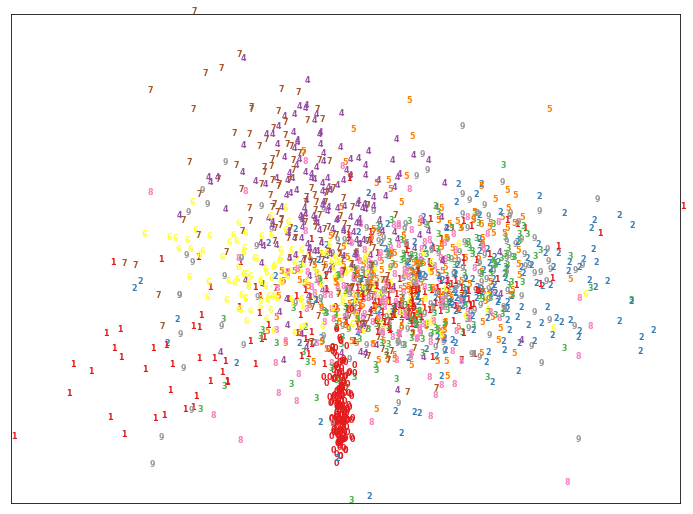

In [27]:
X_lle = manifold.LocallyLinearEmbedding(n_neighbors=30, reg=0.0001, n_components=2).fit_transform(X)
plot_digits(X_lle, digits.target)

# Multidimensional Scaling (MDS)

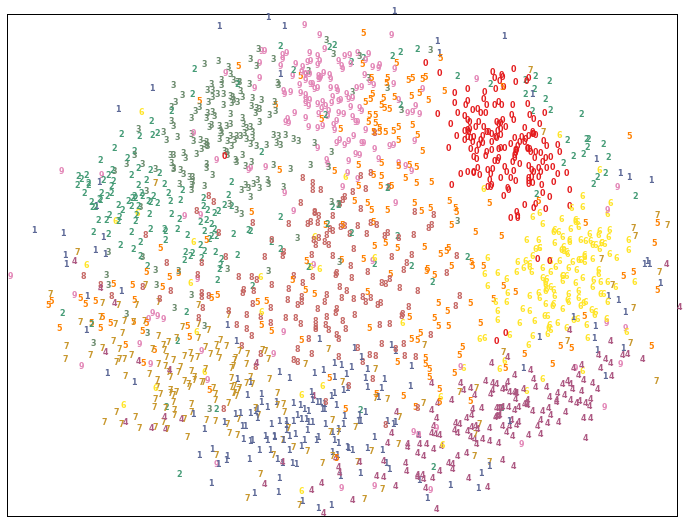

In [10]:
X_mds = manifold.MDS(n_components=2, metric=True, n_init=1, max_iter=100).fit_transform(X)
plot_digits(X_mds, digits.target)

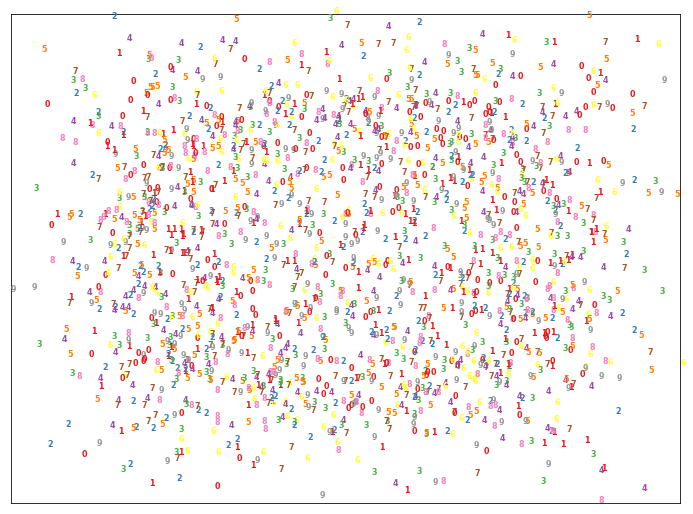

In [29]:
X_mds = manifold.MDS(n_components=2, metric=False, n_init=1, max_iter=100).fit_transform(X)
plot_digits(X_mds, digits.target)

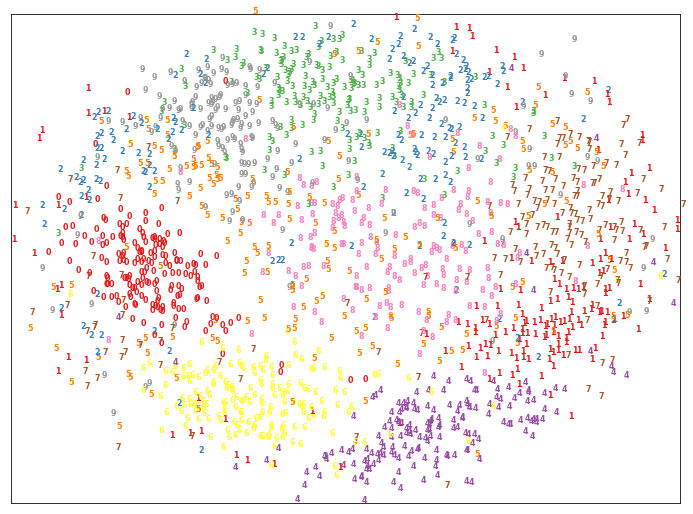

In [30]:
X_mds = manifold.MDS(n_components=2, metric=True, n_init=5, max_iter=100).fit_transform(X)
plot_digits(X_mds, digits.target)

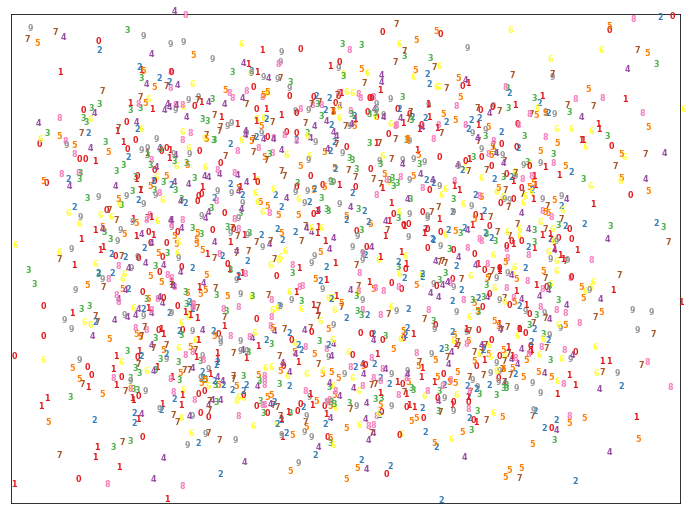

In [32]:
X_mds = manifold.MDS(n_components=2, metric=False, n_init=1, max_iter=100).fit_transform(X)
plot_digits(X_mds, digits.target)

# t-distributed Stochastic Neighbor Embedding (t-SNE)

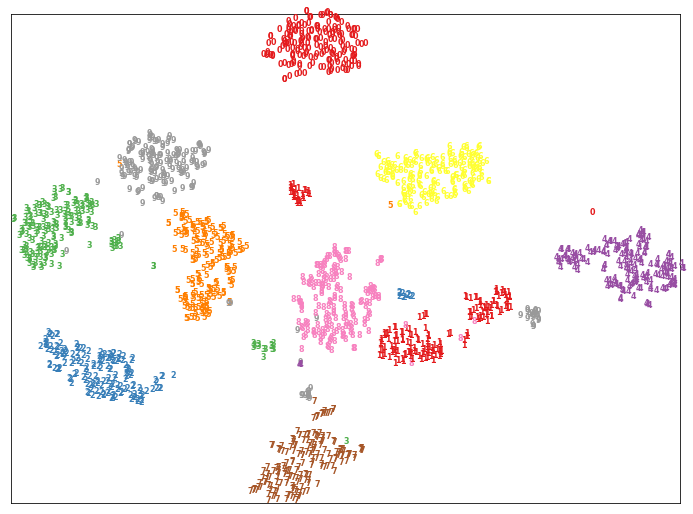

In [34]:
X_tsne = manifold.TSNE(n_components=2, perplexity=30, learning_rate=100, init='pca').fit_transform(X)
plot_digits(X_tsne, digits.target)

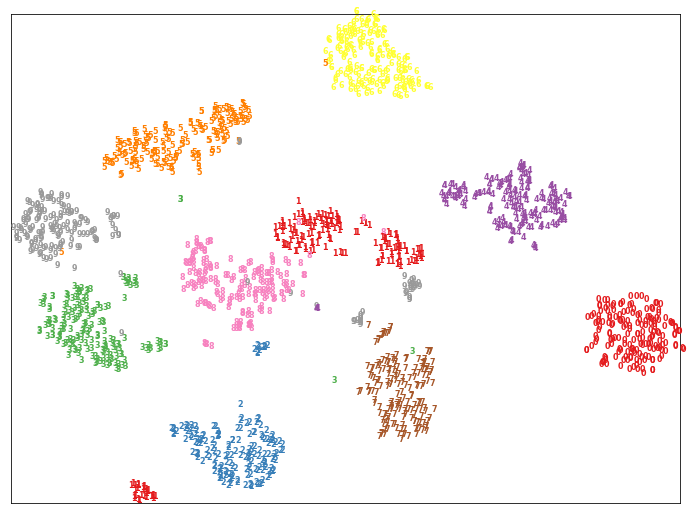

In [35]:
X_tsne = manifold.TSNE(n_components=2, perplexity=30, learning_rate=100, init='random').fit_transform(X)
plot_digits(X_tsne, digits.target)

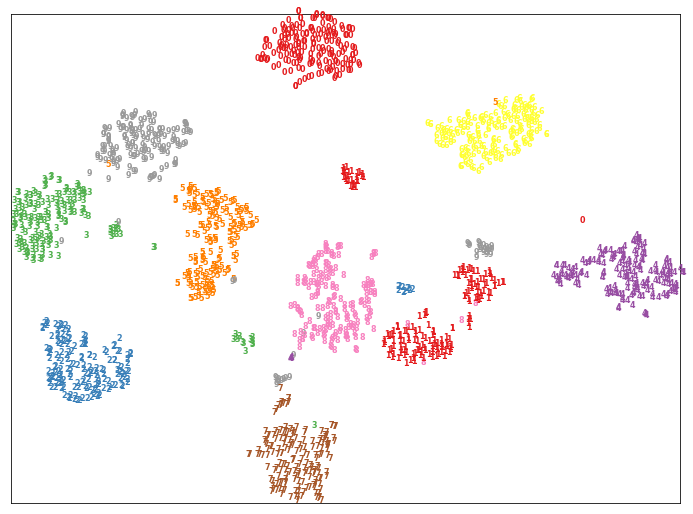

In [36]:
X_tsne = manifold.TSNE(n_components=2, perplexity=30, learning_rate=100, method="exact", init='pca').fit_transform(X)
plot_digits(X_tsne, digits.target)

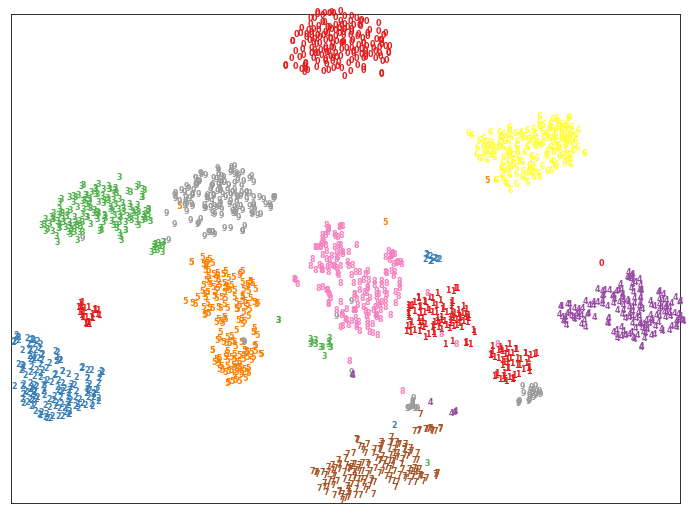

In [37]:
X_tsne = manifold.TSNE(n_components=2, perplexity=50, learning_rate=100, method="exact", init='pca').fit_transform(X)
plot_digits(X_tsne, digits.target)